# Making a correction

## Introduction


This notebook offers an interactive tutorial on using PreFab to **correct** the fabrication result of the same 500 nm-wide target nanostructure used in the previous prediction example. This tutorial is structured as follows:

1. Preparing a device image for correction
2. Executing a correction
3. Making a prediction of the correction

To begin, we need to import the necessary libraries:


In [2]:
import prefab as pf

## Loading a device


The first step involves preparing a device for correction. `Device` is the base class that represents photonic design geometries in PreFab and can be instantiated by loading an image or GDS layout as an ndarray with binary pixel values: 0 or 1. In this tutorial, we'll use an image of a small target structure, but feel free to explore other structures available in the `devices/` directory, or add your own.

The image scale should be 1 nm/px. If not, ensure you specify the length of the entire device image (in nanometers) when loading the image.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

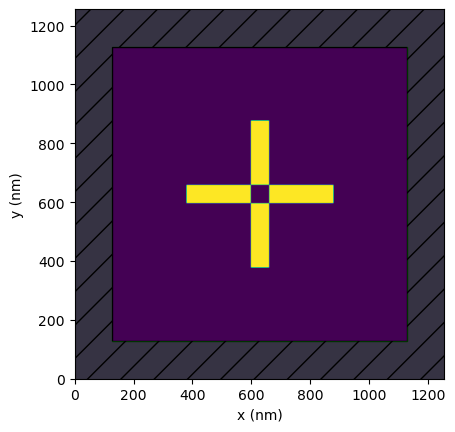

In [15]:
device = pf.read.from_img(
    img_path="../../devices/target_16x128_256x256.png", img_width_nm=1000
)
device.plot()

## Correcting a device


We proceed with the correction of the device for a specific fabrication model. Each model is labeled by its fabrication facility and process name, model version, and dataset version. Refer to `docs/models.md` for a library of available models.


> **Note:** Initial prediction/correction may take longer due to server startup and model loading. Subsequent predictions should be quicker.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

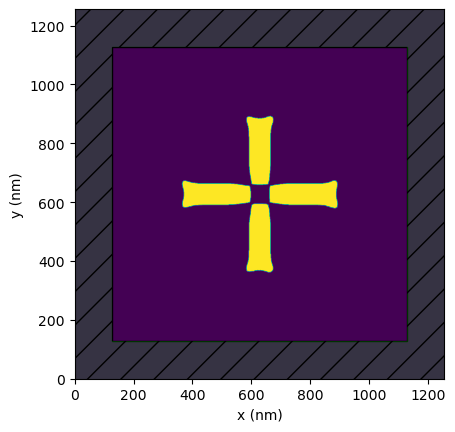

In [10]:
MODEL_NAME = "ANT_NanoSOI"
MODEL_TAGS = "v7-d9"
correction = device.correct(model_name=MODEL_NAME, model_tags=MODEL_TAGS)
correction.plot()

The corrector compensates for expected fabrication errors by adjusting the design. It adds silicon in places where it predicts erosion and removes silicon where it predicts dilation.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

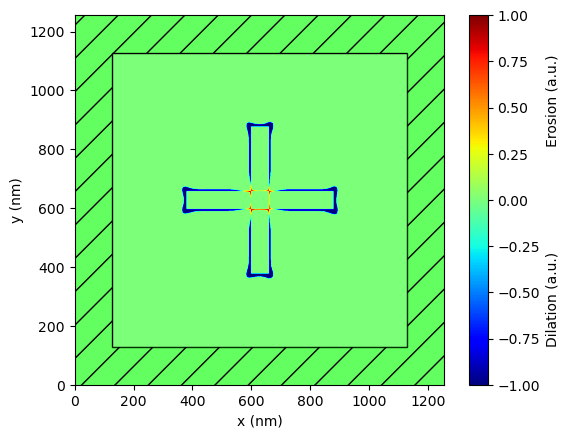

In [16]:
correction.plot_compare(ref_device=device)

## Making a prediction of the correction


We then predict the nanofabrication outcome for the corrected target structure by using the prediction model again.

In the corrected design, the corners are expected to be sharper and the middle opening is better resolved compared to the nominal design. Additionally, the Intersection over Union score is improved from **63% to 91%!** This means that the corrected design will more closely match the intended design, leading to better fabrication outcomes and better chips.


<Axes: xlabel='x (nm)', ylabel='y (nm)'>

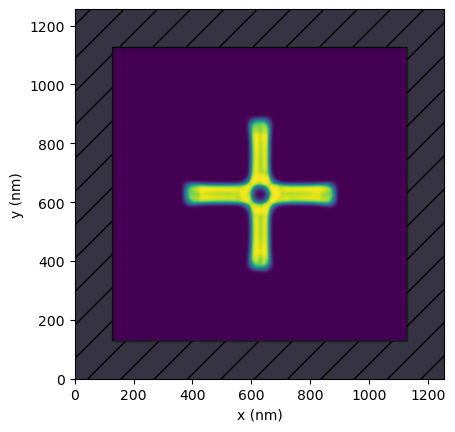

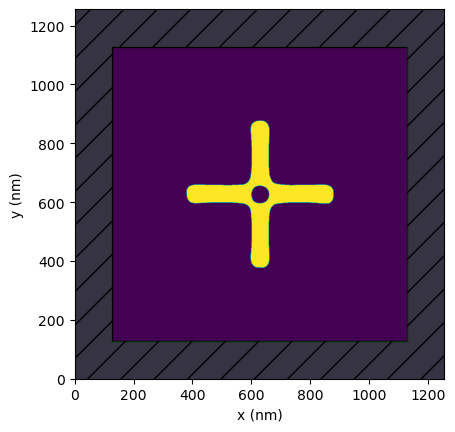

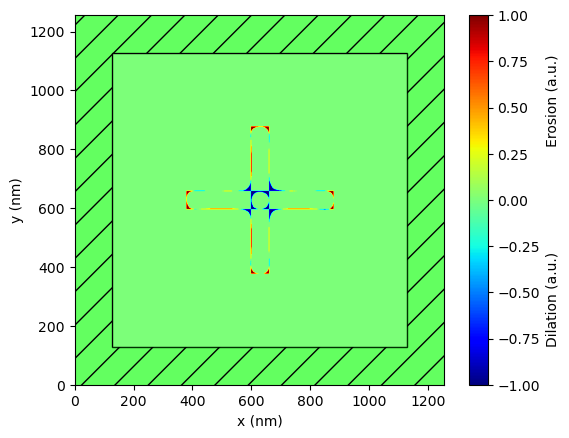

In [17]:
outcome = correction.predict(model_name=MODEL_NAME, model_tags=MODEL_TAGS)
outcome_bin = outcome.binarize()

outcome.plot()
outcome_bin.plot()
outcome_bin.plot_compare(ref_device=device)

In [18]:
print(f"Corrected IoU: {pf.compare.intersection_over_union(device, outcome_bin):.2f}")

Corrected IoU: 0.91


While it may not always be possible to fully restore the original design to 100%, achieving this is our goal. We encourage you to stay up-to-date with our latest models, as we are continually striving to improve.
